In [19]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
#reading the datasets into dataframes
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')


#### Data manipulation
       -Splitting the labels for both training set and validation set.
       -Reshaping both sets into (sample size,28,28,1) where sample size represents the size of the train or validation set.
       -Each pixel values lies between [0,255]. This value range is too high and it will be difficult for any model to                 learn.The best approach is normalize the data. In this case, as the pixel value is in the known range it sufficient to         scale the pixel values in range [0,1] by simply dividing the array by 255.

In [3]:
 # all pixel values
x_train = (train.iloc[:,1:].values).astype('float32')
# only labels i.e targets digits
y_train = (train.iloc[:,0].values).astype('int32') 

x_test = (test.iloc[:,1:].values).astype('float32')

y_test = (test.iloc[:,0].values).astype('int32') 

In [4]:
#normalizing the data
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
#reshape to match keras expectations
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)


In [6]:
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices One Hot Encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Modeling
        -creating the layers using a Convv2D network and a 'relu' activation for input and hidden layers
        -compiling the model using categorical cross entropy as a loss function and Adadelta as activation
        -fitting the model and printing test + accuracy score

In [8]:
#building the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [21]:
#compiling the model
#Model compilation required the selection of optimizer and loss function.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
#fitting the model
history_1 = model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1363 - acc: 0.9601 - val_loss: 0.0501 - val_acc: 0.9841
Epoch 2/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0764 - acc: 0.9775 - val_loss: 0.0459 - val_acc: 0.9867
Epoch 3/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0595 - acc: 0.9828 - val_loss: 0.0360 - val_acc: 0.9877
Epoch 4/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0505 - acc: 0.9852 - val_loss: 0.0291 - val_acc: 0.9899
Epoch 5/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0440 - acc: 0.9869 - val_loss: 0.0345 - val_acc: 0.9895
Epoch 6/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0411 - acc: 0.9880 - val_loss: 0.0271 - val_acc: 0.9913
Epoch 7/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0368 - acc: 0.9890 - val_loss: 0.0327 - val_acc

Let's see how the training goes—plotting the accuracy and loss of both training and validation set with each epoch.
In the accuracy graphs, there is clearly a difference in the training and validation set. 
The model is more accurate on the training set. It seems that the model is a little bit overfit


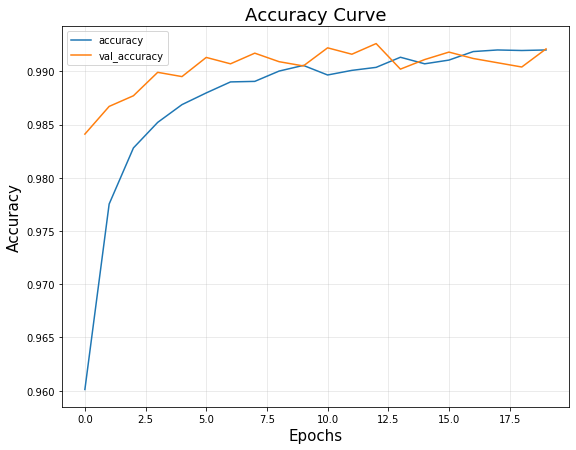

In [13]:
# Defining Figure
f = plt.figure(figsize=(20,7))

#Adding Subplot 1 (For Accuracy)
f.add_subplot(121)

# Accuracy curve for training set
plt.plot(history_1.epoch,history_1.history['acc'],label = "accuracy") 
# Accuracy curve for validation set
plt.plot(history_1.epoch,history_1.history['val_acc'],label = "val_accuracy") 

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

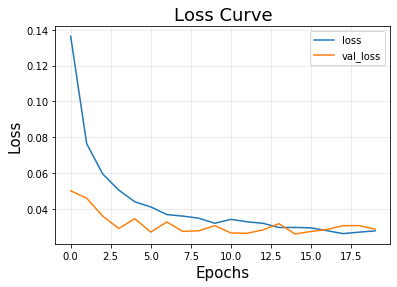

In [14]:
#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history_1.epoch,history_1.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_1.epoch,history_1.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


In [15]:
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

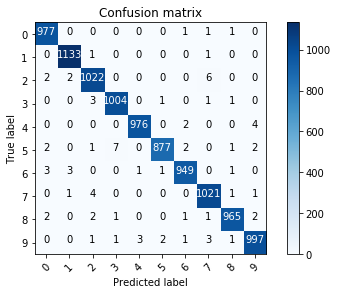

In [20]:
#predicting
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))